Для обучения модели взял датасет из открытого репозитория https://github.com/JeffSackmann/tennis_atp
Были взяты игры 1 на 1 среди мужчин.

In [ ]:
import pandas as pd


def combine_atp_datasets():
    all_data = pd.DataFrame()

    for year in range(1968, 2025):
        file = "./DATASETS/atp_matches_" + str(year) + ".csv"

        year_data = pd.read_csv(file)

        year_data['year'] = int(year)

        all_data = pd.concat([all_data, year_data], axis=0)

    return all_data

In [ ]:
def analyze_dataset(df: pd.DataFrame):
    print("=" * 60)
    print("АНАЛИЗ РАЗМЕРНОСТИ ДАТАСЕТА ATP МАТЧЕЙ")
    print("=" * 60)

    # Основные размерности
    n_samples = len(df)
    n_features = len(df.columns)

    print(f"\nОСНОВНЫЕ РАЗМЕРНОСТИ:")
    print(f"   Количество семплов (строк): {n_samples:,}")
    print(f"   Количество признаков (колонок): {n_features}")
    print(f"   Общий размер датасета: {n_samples:,} x {n_features}")

    # Анализ памяти
    memory_usage = df.memory_usage(deep=True).sum()
    print(f"   Использование памяти: {memory_usage / (1024 * 1024):.2f} MB")

    # Общая статистика по пропускам
    total_cells = n_samples * n_features
    total_missing = df.isnull().sum().sum()
    missing_percent = (total_missing / total_cells) * 100
    print(f"   Общее количество пропусков: {total_missing:,} из {total_cells:,} ({missing_percent:.2f}%)")

    # Список всех признаков
    print(f"\nСПИСОК ВСЕХ ПРИЗНАКОВ ({n_features} шт.):")
    print("-" * 60)
    for i, col in enumerate(df.columns, 1):
        dtype = str(df[col].dtype)
        non_null = df[col].count()
        null_count = n_samples - non_null
        null_percent = (null_count / n_samples) * 100
        print(f"{i:2d}. {col:<25} | {dtype:<10} | {non_null:>6,} значений | {null_count:>6,} пропусков ({null_percent:5.1f}%)")

    # Анализ типов данных
    print(f"\nАНАЛИЗ ТИПОВ ДАННЫХ:")
    dtype_counts = df.dtypes.value_counts()
    for dtype, count in dtype_counts.items():
        print(f"   {dtype}: {count} признаков")

    # Анализ пропущенных значений
    print(f"\nАНАЛИЗ ПРОПУЩЕННЫХ ЗНАЧЕНИЙ:")
    missing_data = df.isnull().sum()
    missing_sorted = missing_data.sort_values(ascending=False)

    print(f"   Всего признаков с пропусками: {(missing_data > 0).sum()}")
    print(f"   Топ-10 признаков с наибольшим количеством пропусков:")
    for col, missing_count in missing_sorted.head(10).items():
        if missing_count > 0:
            percent = (missing_count / n_samples) * 100
            print(f"   - {col:<25}: {missing_count:>6,} ({percent:5.1f}%)")

    # Временной период
    if 'year' in df.columns:
        print(f"\nВРЕМЕННОЙ ПЕРИОД:")
        print(f"   Годы: {df['year'].min()} - {df['year'].max()}")
        print(f"   Период: {df['year'].max() - df['year'].min() + 1} лет")

    # Основные статистики для всех типов данных
    print(f"\n" + "=" * 60)
    print("ОСНОВНЫЕ СТАТИСТИКИ ДЛЯ ВСЕХ ПРИЗНАКОВ")
    print("=" * 60)

    stats = df.describe(include='all')

    # Выводим статистики
    print("\nЧИСЛОВЫЕ ПРИЗНАКИ:")
    print("-" * 60)
    numeric_cols = df.select_dtypes(include=['number']).columns
    for col in numeric_cols:
        if col in stats.columns:
            print(f"\n{col}:")
            col_stats = stats[col]
            print(f"  Количество: {col_stats.get('count', 'N/A'):,.0f}")
            print(f"  Среднее: {col_stats.get('mean', 'N/A'):.2f}")
            print(f"  Стд. отклонение: {col_stats.get('std', 'N/A'):.2f}")
            print(f"  Минимум: {col_stats.get('min', 'N/A')}")
            print(f"  25%: {col_stats.get('25%', 'N/A')}")
            print(f"  50% (медиана): {col_stats.get('50%', 'N/A')}")
            print(f"  75%: {col_stats.get('75%', 'N/A')}")
            print(f"  Максимум: {col_stats.get('max', 'N/A')}")

    print(f"\n" + "=" * 60)
    print("КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ:")
    print("-" * 60)
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        if col in stats.columns:
            print(f"\n{col}:")
            col_stats = stats[col]
            print(f"  Количество: {col_stats.get('count', 'N/A'):,.0f}")
            print(f"  Уникальных значений: {col_stats.get('unique', 'N/A')}")
            print(f"  Наиболее частое: {col_stats.get('top', 'N/A')}")
            print(f"  Частота: {col_stats.get('freq', 'N/A'):,.0f}")

            # Показываем топ-5 наиболее частых значений
            top_values = df[col].value_counts().head(5)
            print(f"  Топ-5 значений:")
            for value, count in top_values.items():
                percent = (count / len(df)) * 100
                print(f"    {value}: {count:,} ({percent:.1f}%)")

    # Дополнительный анализ распределений
    print(f"\n" + "=" * 60)
    print("ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ РАСПРЕДЕЛЕНИЙ")
    print("=" * 60)

    # Анализ покрытий
    if 'surface' in df.columns:
        print(f"\nРАСПРЕДЕЛЕНИЕ ПО ПОВЕРХНОСТЯМ:")
        surface_counts = df['surface'].value_counts()
        for surface, count in surface_counts.items():
            percent = (count / len(df)) * 100
            print(f"  {surface}: {count:,} матчей ({percent:.1f}%)")

    # Анализ уровней турниров
    if 'tourney_level' in df.columns:
        print(f"\nРАСПРЕДЕЛЕНИЕ ПО УРОВНЯМ ТУРНИРОВ:")
        level_counts = df['tourney_level'].value_counts()
        for level, count in level_counts.items():
            percent = (count / len(df)) * 100
            print(f"  {level}: {count:,} матчей ({percent:.1f}%)")

    # Анализ раундов
    if 'round' in df.columns:
        print(f"\nРАСПРЕДЕЛЕНИЕ ПО РАУНДАМ:")
        round_counts = df['round'].value_counts()
        for round_name, count in round_counts.items():
            percent = (count / len(df)) * 100
            print(f"  {round_name}: {count:,} матчей ({percent:.1f}%)")

    print(f"\n" + "=" * 60)
    print("АНАЛИЗ ЗАВЕРШЕН")
    print("=" * 60)

In [30]:
all_data_df = combine_atp_datasets()
analyze_dataset(all_data_df)


ЧИСЛОВЫЕ ПРИЗНАКИ:
------------------------------------------------------------

draw_size:
  Количество: 194,161
  Среднее: 53.24
  Стд. отклонение: 36.82
  Минимум: 2.0
  25%: 32.0
  50% (медиана): 32.0
  75%: 64.0
  Максимум: 128.0

tourney_date:
  Количество: 194,996
  Среднее: 19941901.36
  Стд. отклонение: 161356.35
  Минимум: 19671228.0
  25%: 19800714.0
  50% (медиана): 19931004.0
  75%: 20071231.0
  Максимум: 20241218.0

match_num:
  Количество: 194,996
  Среднее: 82.14
  Стд. отклонение: 113.87
  Минимум: 1.0
  25%: 11.0
  50% (медиана): 26.0
  75%: 105.0
  Максимум: 1701.0

winner_id:
  Количество: 194,996
  Среднее: 105319.93
  Стд. отклонение: 16049.73
  Минимум: 100001.0
  25%: 100434.0
  50% (медиана): 101746.0
  75%: 104098.0
  Максимум: 212721.0

winner_seed:
  Количество: 72,220
  Среднее: 6.34
  Стд. отклонение: 5.59
  Минимум: 1.0
  25%: 2.0
  50% (медиана): 5.0
  75%: 8.0
  Максимум: 35.0

winner_ht:
  Количество: 178,366
  Среднее: 184.57
  Стд. отклонение: 6.78


In [31]:
import numpy as np
import matplotlib.pyplot as plt


def plot_boxplots_grid(df, cols=None, ncols=3, figsize_per_plot=(4, 2.5), savepath=None):
    num = df.select_dtypes(include=[np.number])
    if cols is not None:
        num = num[cols]
    if num.shape[1] == 0:
        raise ValueError("Нет числовых колонок для построения.")
    n = num.shape[1]
    nrows = (n + ncols - 1) // ncols
    figsize = (ncols * figsize_per_plot[0], nrows * figsize_per_plot[1])
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize, squeeze=False)

    for i, col in enumerate(num.columns):
        r, c = divmod(i, ncols)
        ax = axes[r][c]
        data = num[col].dropna()
        ax.boxplot(data,
                   vert=False,
                   patch_artist=True,
                   widths=0.6,
                   boxprops=dict(facecolor='lightcoral', color='black'),
                   medianprops=dict(color='yellow', linewidth=2),
                   whiskerprops=dict(color='black'),
                   capprops=dict(color='black'),
                   flierprops=dict(marker='o', markerfacecolor='green', markeredgecolor='black', markersize=6, alpha=0.8))
        ax.set_title(col, fontsize=9)
        ax.grid(axis='x', linestyle='--', alpha=0.3)

    for j in range(n, nrows * ncols):
        r, c = divmod(j, ncols)
        axes[r][c].axis('off')

    plt.tight_layout()
    if savepath:
        plt.savefig(savepath, dpi=150, bbox_inches='tight')
    plt.show()


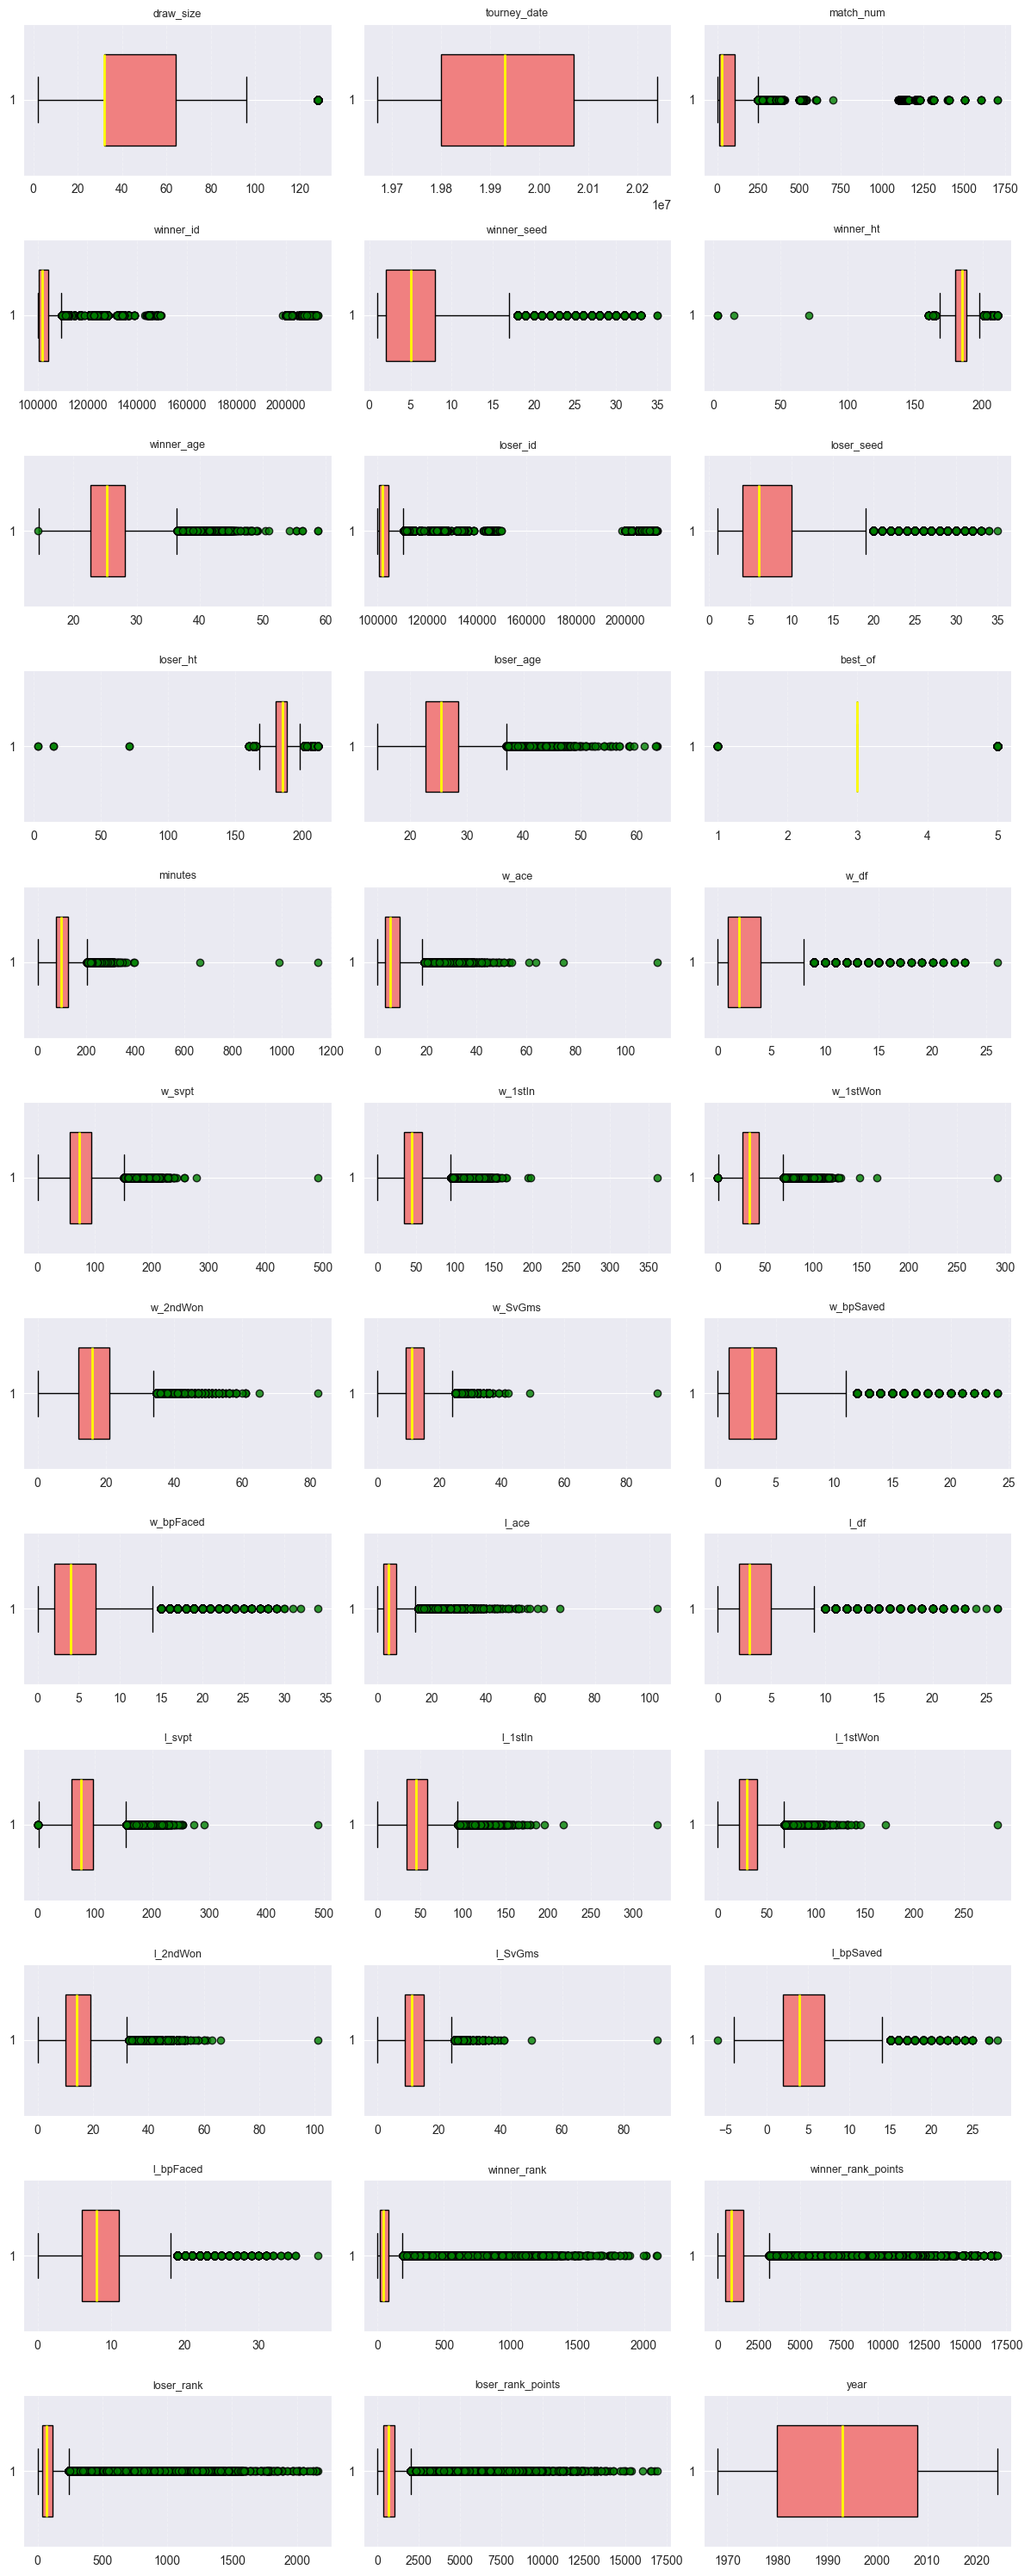

In [32]:
plot_boxplots_grid(all_data_df)

# Ключевые наблюдения

Размер и пропуски: 194,996 строк × 50 колонок; 28.44% ячеек пропущено это существенно, но ожидаемо для исторического теннисного датасета (старые матчи не содержат детальной статистики).

Очень много пропусков в статистиках по матчам (w_*/l_*, minutes) ~49-51% отсутствует. Детальная статистика ведется с внедрения электронного сбора данных.

**winner_entry / loser_entry** почти полностью пусты (91% и 85% пропусков). Значения присутствуют только для небольшого подмножества матчей

#### Ошибки в полях:

**winner_ht и loser_ht** включают значения 3 и 70, однозначно ошибочные записи (скорее всего опечатка).

**minutes** минимум 0 и максимум 1146, 0 может означать неизвестно/отсутствует, а 1146 мин (19 часов) явно ошибка так как самый длинный матч длился 665 минут, все матчи длиннее будем считать не валидными.

**l_bpSaved** минимум −6, отрицательное количество спасённых брейк-поинтов невозможно это ошибка.

# Очистка данных

In [33]:
all_data_filtered = all_data_df.dropna(subset=[
    'winner_id', 'loser_id', 'winner_ht', 'loser_ht', 'winner_age', 'loser_age',
    'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
    'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn', 'l_1stWon',
    'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced', 'winner_rank',
    'loser_rank', 'winner_rank_points', 'loser_rank_points', 'surface'
])
all_data_filtered = all_data_filtered.reset_index(drop=True)

all_data_filtered = all_data_filtered.drop(columns=['winner_seed', 'winner_entry', 'loser_seed', 'loser_entry'])

all_data_filtered = all_data_filtered.loc[
    (all_data_filtered['winner_ht'] >= 140) &
    (all_data_filtered['loser_ht'] >= 140) &
    (all_data_filtered['minutes'].isna() | (all_data_filtered['minutes'] <= 664)) &
    (all_data_filtered['l_bpSaved'].isna() | (all_data_filtered['l_bpSaved'] >= 0))
    ].reset_index(drop=True)

In [34]:
analyze_dataset(all_data_filtered)

АНАЛИЗ РАЗМЕРНОСТИ ДАТАСЕТА ATP МАТЧЕЙ

ОСНОВНЫЕ РАЗМЕРНОСТИ:
   Количество семплов (строк): 95,367
   Количество признаков (колонок): 46
   Общий размер датасета: 95,367 x 46
   Использование памяти: 93.67 MB
   Общее количество пропусков: 2,971 из 4,386,882 (0.07%)

СПИСОК ВСЕХ ПРИЗНАКОВ (46 шт.):
------------------------------------------------------------
 1. tourney_id                | object     | 95,367 значений |      0 пропусков (  0.0%)
 2. tourney_name              | object     | 95,367 значений |      0 пропусков (  0.0%)
 3. surface                   | object     | 95,367 значений |      0 пропусков (  0.0%)
 4. draw_size                 | float64    | 95,367 значений |      0 пропусков (  0.0%)
 5. tourney_level             | object     | 95,367 значений |      0 пропусков (  0.0%)
 6. tourney_date              | int64      | 95,367 значений |      0 пропусков (  0.0%)
 7. match_num                 | int64      | 95,367 значений |      0 пропусков (  0.0%)
 8. winner_id  

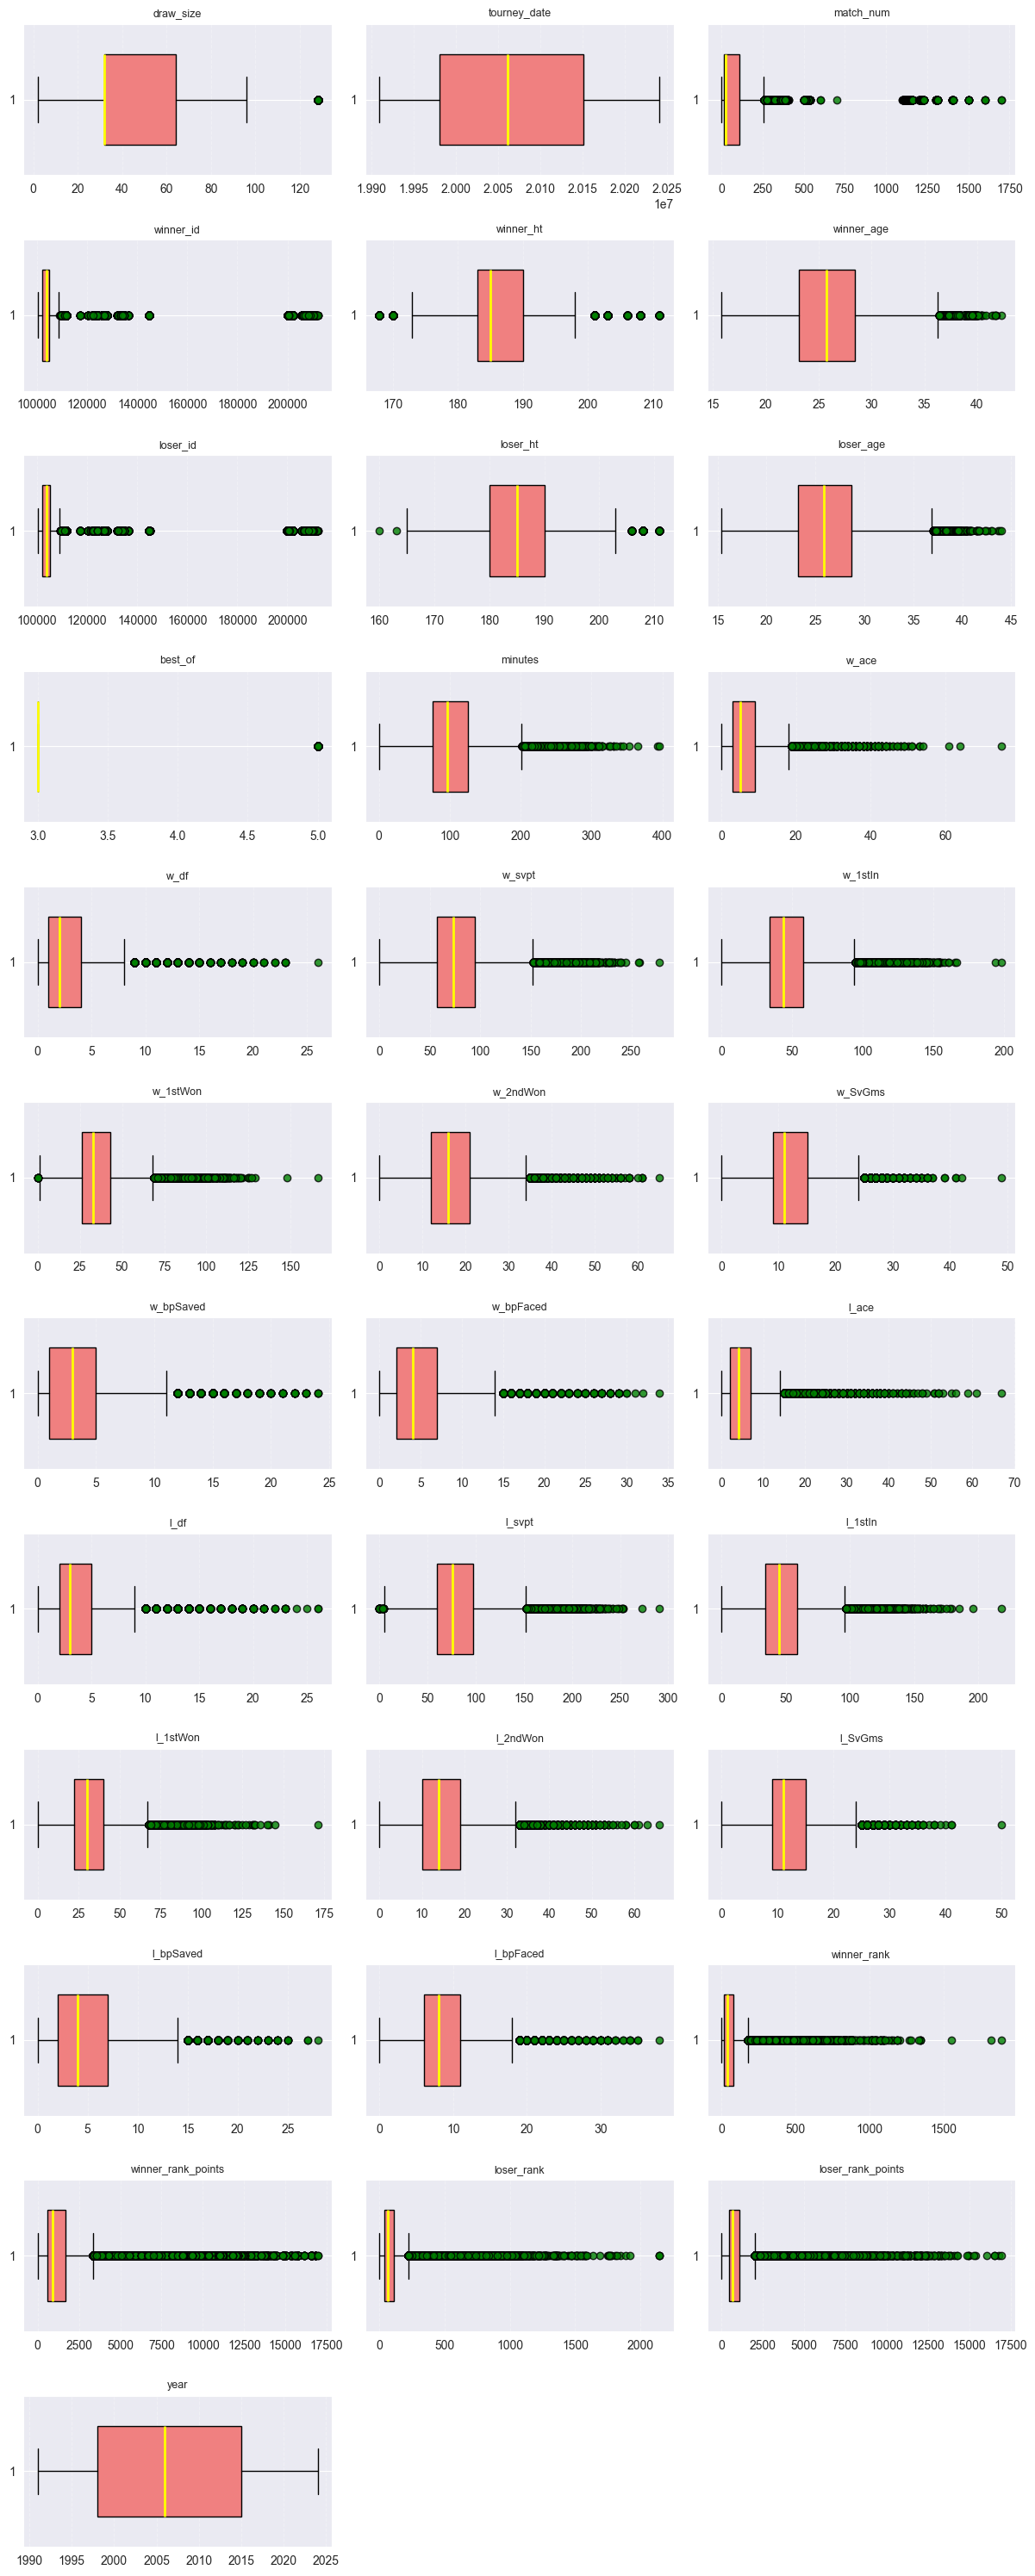

In [35]:
plot_boxplots_grid(all_data_filtered)

Записи с большим количеством пропусков или невалидными данными были удалены, так как у нас не временной ряд мы не можем их обработать

In [36]:
initial_rows = len(all_data_df)
filtered_rows = len(all_data_filtered)

reduction_percent = (initial_rows - filtered_rows) / initial_rows * 100

print(f"Исходный размер датасета: {initial_rows:,} строк")
print(f"После фильтрации осталось: {filtered_rows:,} строк")
print(f"Сокращение: {reduction_percent:.2f}%")

Исходный размер датасета: 194,996 строк
После фильтрации осталось: 95,367 строк
Сокращение: 51.09%


Данные сократились на 51.09%

# Преобразуем данные

In [37]:
import pandas as pd
import numpy as np
from collections import defaultdict


# ---------- utilities ----------
def _infer_stat_basenames(df):
    """
    Возвращает базовые имена статистик в UPPER (ACE, DF, 1ST_IN, ...),
    извлекает по префиксам w_/l_.
    """
    w_cols = [c[2:].upper() for c in df.columns if c.startswith('w_')]
    l_cols = [c[2:].upper() for c in df.columns if c.startswith('l_')]
    basenames = sorted(set(w_cols).intersection(l_cols))
    return basenames


# ---------- long format & rolling ----------
def create_long_format(df, stat_basenames):
    base_cols = ['match_idx', 'tourney_date', 'winner_id', 'loser_id']

    w_cols = [f"w_{s.lower()}" for s in stat_basenames]
    l_cols = [f"l_{s.lower()}" for s in stat_basenames]

    winners = df[base_cols + [c for c in w_cols if c in df.columns]].copy()
    winners = winners.rename(columns={'winner_id': 'player_id', 'loser_id': 'opponent_id'})

    rename_w = {f"w_{s.lower()}": s for s in stat_basenames if f"w_{s.lower()}" in winners.columns}
    winners = winners.rename(columns=rename_w)
    winners['is_winner'] = 1

    losers = df[base_cols + [c for c in l_cols if c in df.columns]].copy()
    losers = losers.rename(columns={'loser_id': 'player_id', 'winner_id': 'opponent_id'})
    rename_l = {f"l_{s.lower()}": s for s in stat_basenames if f"l_{s.lower()}" in losers.columns}
    losers = losers.rename(columns=rename_l)
    losers['is_winner'] = 0

    long = pd.concat([winners, losers], ignore_index=True, sort=False)
    long['tourney_date'] = pd.to_datetime(long['tourney_date'], format='%Y%m%d')
    long = long.sort_values(['player_id', 'tourney_date', 'match_idx']).reset_index(drop=True)
    return long


def compute_rolling_features(long, stat_basenames, windows=(3, 5, 10, 20, 25, 50, 100, 200, 300, 2000)):
    long = long.copy()

    for s in stat_basenames:
        long[s] = pd.to_numeric(long.get(s, pd.Series(np.nan, index=long.index)), errors='coerce')

    out = long[['match_idx', 'player_id', 'tourney_date']].copy()

    out['games_count'] = long.groupby('player_id').cumcount()

    for w in windows:
        col = f"WIN_LAST_{w}"
        out[col] = (long.groupby('player_id')['is_winner']
                    .transform(lambda x: x.shift().rolling(window=w, min_periods=1).mean()))

    for w in windows:
        for s in stat_basenames:
            col = f"{s}_LAST_{w}"
            out[col] = (long.groupby('player_id')[s]
                        .transform(lambda x: x.shift().rolling(window=w, min_periods=1).mean()))

    return out


# ---------- ELO (global and by-surface) ----------
def compute_elo_pre_match(df, k=32, init_elo=1500):
    elo = defaultdict(lambda: init_elo)
    records = []
    for _, row in df.iterrows():
        idx = row['match_idx']
        p_w = row['winner_id'];
        p_l = row['loser_id']
        e_w = elo[p_w];
        e_l = elo[p_l]
        records.append({'match_idx': idx, 'winner_elo_pre': e_w, 'loser_elo_pre': e_l})
        exp_w = 1 / (1 + 10 ** ((e_l - e_w) / 400))
        exp_l = 1 - exp_w
        elo[p_w] = e_w + k * (1 - exp_w)
        elo[p_l] = e_l + k * (0 - exp_l)
    return pd.DataFrame.from_records(records).set_index('match_idx').sort_index()


def compute_elo_pre_match_by_surface(df, k=32, init_elo=1500):
    elo_by_surface = defaultdict(lambda: defaultdict(lambda: init_elo))
    records = []
    for _, row in df.iterrows():
        idx = row['match_idx']
        surface = row.get('surface', 'UNKNOWN')
        p_w = row['winner_id'];
        p_l = row['loser_id']
        e_w = elo_by_surface[surface][p_w];
        e_l = elo_by_surface[surface][p_l]
        records.append({
            'match_idx': idx,
            'winner_elo_surface_pre': e_w,
            'loser_elo_surface_pre': e_l,
            'surface': surface
        })
        exp_w = 1 / (1 + 10 ** ((e_l - e_w) / 400))
        elo_by_surface[surface][p_w] = e_w + k * (1 - exp_w)
        elo_by_surface[surface][p_l] = e_l + k * (0 - (1 - exp_w))
    return pd.DataFrame.from_records(records).set_index('match_idx').sort_index()


# ---------- H2H (global & by-surface) ----------
def compute_h2h_prior(df):
    pairs = df[['match_idx', 'tourney_date', 'winner_id', 'loser_id']].copy()
    pairs['p1'] = pairs[['winner_id', 'loser_id']].min(axis=1)
    pairs['p2'] = pairs[['winner_id', 'loser_id']].max(axis=1)
    pairs['p1_win_now'] = (pairs['winner_id'] == pairs['p1']).astype(int)
    pairs = pairs.sort_values('tourney_date')
    groups = pairs.groupby(['p1', 'p2'])
    pairs['p1_wins_prior'] = groups['p1_win_now'].cumsum().shift(1).fillna(0).astype(int)
    pairs['total_prior'] = groups.cumcount()
    return pairs.set_index('match_idx')[['p1', 'p2', 'p1_wins_prior', 'total_prior']].sort_index()


def compute_h2h_by_surface(df):
    pairs = df[['match_idx', 'tourney_date', 'surface', 'winner_id', 'loser_id']].copy()
    pairs['p1'] = pairs[['winner_id', 'loser_id']].min(axis=1)
    pairs['p2'] = pairs[['winner_id', 'loser_id']].max(axis=1)
    pairs['p1_win_now'] = (pairs['winner_id'] == pairs['p1']).astype(int)
    pairs = pairs.sort_values('tourney_date')
    groups = pairs.groupby(['p1', 'p2', 'surface'])
    pairs['p1_wins_surface_prior'] = groups['p1_win_now'].cumsum().shift(1).fillna(0).astype(int)
    pairs['total_surface_prior'] = groups.cumcount()
    return pairs.set_index('match_idx')[['p1', 'p2', 'p1_wins_surface_prior', 'total_surface_prior']].sort_index()


# ---------- ELO gradients ----------
def compute_elo_gradients_from_player_series(df, elo_col_name='PLAYER_ELO_PRE', windows=(5, 10, 20, 35, 50, 100, 250)):
    tmp = df[['match_idx', 'player_id', 'tourney_date', 'PLAYER_ELO_PRE']].copy()
    tmp = tmp.sort_values(['player_id', 'tourney_date', 'match_idx'])
    out = tmp[['match_idx', 'player_id']].copy()
    for w in windows:
        col = f"PLAYER_ELO_GRAD_{w}"
        out[col] = tmp.groupby('player_id')['PLAYER_ELO_PRE'].transform(lambda x: x.diff(w))
    return out


# ---------- main pipeline ----------
def create_normalized_dataset(df,
                              windows=(3, 5, 10, 20, 25, 50, 100, 200, 300, 2000),
                              k_elo=32,
                              init_elo=1500,
                              elo_grad_windows=(5, 10, 20, 35, 50, 100, 250)):
    df = df.copy()

    rename_map = {}
    for col in df.columns:
        if col.startswith(('w_', 'l_')):
            rename_map[col] = col.lower()
    if rename_map:
        df = df.rename(columns=rename_map)

    df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')
    df['match_idx'] = np.arange(len(df))

    np.random.seed(42)

    random_swap = np.random.random(len(df)) < 0.5

    df['PLAYER_1'] = np.where(random_swap, df['winner_id'], df['loser_id'])
    df['PLAYER_2'] = np.where(random_swap, df['loser_id'], df['winner_id'])
    df['RESULT'] = (df['PLAYER_1'] == df['winner_id']).astype(int)

    # ---------- STATIC per-player ----------
    def pick_pair(col_w, col_l):
        p1vals = np.where(df['PLAYER_1'] == df['winner_id'], df.get(col_w, np.nan), df.get(col_l, np.nan))
        p2vals = np.where(df['PLAYER_2'] == df['winner_id'], df.get(col_w, np.nan), df.get(col_l, np.nan))
        return p1vals, p2vals

    p1_points, p2_points = pick_pair('winner_rank_points', 'loser_rank_points')
    df['ATP_POINT_DIFF'] = p1_points - p2_points

    p1_rank, p2_rank = pick_pair('winner_rank', 'loser_rank')

    df['ATP_RANK_DIFF'] = (p2_rank.astype(float)) - (p1_rank.astype(float))

    p1_age, p2_age = pick_pair('winner_age', 'loser_age')
    df['AGE_DIFF'] = p1_age - p2_age

    p1_ht, p2_ht = pick_pair('winner_ht', 'loser_ht')
    df['HEIGHT_DIFF'] = p1_ht - p2_ht

    df['BEST_OF'] = df['best_of'] if 'best_of' in df.columns else np.nan
    df['DRAW_SIZE'] = df['draw_size'] if 'draw_size' in df.columns else np.nan

    # ---------- Rolling stats ----------
    stat_basenames = _infer_stat_basenames(df)
    if len(stat_basenames) > 0:
        long = create_long_format(df, stat_basenames)
        long_feat = compute_rolling_features(long, stat_basenames, windows=windows)

        rolling_cols = [c for c in long_feat.columns if c not in ('match_idx', 'player_id', 'tourney_date')]

        helper = long_feat.copy()

        helper_p1 = helper.rename(columns={'player_id': 'PLAYER_1'})

        helper_p1 = helper_p1.rename(columns={c: f"p1_{c}" for c in rolling_cols})
        df = df.merge(helper_p1, how='left', on=['match_idx', 'PLAYER_1'])

        helper_p2 = helper.rename(columns={'player_id': 'PLAYER_2'})
        helper_p2 = helper_p2.rename(columns={c: f"p2_{c}" for c in rolling_cols})
        df = df.merge(helper_p2, how='left', on=['match_idx', 'PLAYER_2'])

        for c in rolling_cols:
            if c.startswith('WIN_LAST_'):
                for suffix in ['WIN_LAST_']: pass

            out_col = f"P_{c}_DIFF"
            p1_col = f"p1_{c}"
            p2_col = f"p2_{c}"
            if p1_col in df.columns and p2_col in df.columns:
                df[out_col] = df[p1_col] - df[p2_col]

        if 'games_count' in rolling_cols and 'p1_games_count' in df.columns and 'p2_games_count' in df.columns:
            df['DIFF_N_GAMES'] = df['p1_games_count'] - df['p2_games_count']

    # ---------- ELO ----------
    elo_df = compute_elo_pre_match(df.sort_values('tourney_date'), k=k_elo, init_elo=init_elo)
    df = df.merge(elo_df.reset_index(), on='match_idx', how='left')
    df['ELO_P1_PRE'] = np.where(df['PLAYER_1'] == df['winner_id'], df['winner_elo_pre'], df['loser_elo_pre'])
    df['ELO_P2_PRE'] = np.where(df['PLAYER_2'] == df['winner_id'], df['winner_elo_pre'], df['loser_elo_pre'])
    df['ELO_DIFF'] = df['ELO_P1_PRE'] - df['ELO_P2_PRE']

    # ELO by surface
    elo_surf = compute_elo_pre_match_by_surface(df.sort_values('tourney_date'), k=k_elo, init_elo=init_elo)
    df = df.merge(elo_surf.reset_index()[['match_idx', 'winner_elo_surface_pre', 'loser_elo_surface_pre']], on='match_idx', how='left')
    df['ELO_P1_SURF_PRE'] = np.where(df['PLAYER_1'] == df['winner_id'], df['winner_elo_surface_pre'], df['loser_elo_surface_pre'])
    df['ELO_P2_SURF_PRE'] = np.where(df['PLAYER_2'] == df['winner_id'], df['winner_elo_surface_pre'], df['loser_elo_surface_pre'])
    df['ELO_SURFACE_DIFF'] = df['ELO_P1_SURF_PRE'] - df['ELO_P2_SURF_PRE']

    # ---------- H2H ----------
    h2h = compute_h2h_prior(df.sort_values('tourney_date'))
    df = df.merge(h2h.reset_index(), on='match_idx', how='left')  # p1, p2, p1_wins_prior, total_prior

    df['player1_is_p1'] = (df['PLAYER_1'] == df['p1']).astype(int)
    df['PLAYER1_H2H_WINS_PRIOR'] = np.where(df['player1_is_p1'] == 1, df['p1_wins_prior'], df['total_prior'] - df['p1_wins_prior'])
    df['PLAYER2_H2H_WINS_PRIOR'] = df['total_prior'] - df['PLAYER1_H2H_WINS_PRIOR']
    df['H2H_DIFF'] = df['PLAYER1_H2H_WINS_PRIOR'] - df['PLAYER2_H2H_WINS_PRIOR']

    # H2H by surface
    h2h_surf = compute_h2h_by_surface(df.sort_values('tourney_date'))
    df = df.merge(h2h_surf.reset_index(), on='match_idx', how='left')

    df['PLAYER1_H2H_WINS_SURF_PRIOR'] = np.where(
        df['player1_is_p1'] == 1,
        df['p1_wins_surface_prior'].fillna(0),
        df['total_surface_prior'].fillna(0) - df['p1_wins_surface_prior'].fillna(0)
    )
    df['PLAYER2_H2H_WINS_SURF_PRIOR'] = df['total_surface_prior'].fillna(0) - df['PLAYER1_H2H_WINS_SURF_PRIOR']
    df['H2H_SURFACE_DIFF'] = df['PLAYER1_H2H_WINS_SURF_PRIOR'] - df['PLAYER2_H2H_WINS_SURF_PRIOR']

    # ---------- ELO gradients ----------

    long_elo_p1 = df[['match_idx', 'tourney_date', 'PLAYER_1', 'ELO_P1_PRE']].rename(columns={'PLAYER_1': 'player_id', 'ELO_P1_PRE': 'PLAYER_ELO_PRE'})
    long_elo_p2 = df[['match_idx', 'tourney_date', 'PLAYER_2', 'ELO_P2_PRE']].rename(columns={'PLAYER_2': 'player_id', 'ELO_P2_PRE': 'PLAYER_ELO_PRE'})
    long_elo = pd.concat([long_elo_p1, long_elo_p2], ignore_index=True, sort=False)
    elo_grads = compute_elo_gradients_from_player_series(long_elo, 'PLAYER_ELO_PRE', windows=elo_grad_windows)

    df = df.merge(elo_grads.add_suffix('_P1'), how='left', left_on=['match_idx', 'PLAYER_1'], right_on=['match_idx_P1', 'player_id_P1'])

    df = df.merge(elo_grads.add_suffix('_P2'), how='left', left_on=['match_idx', 'PLAYER_2'], right_on=['match_idx_P2', 'player_id_P2'])

    for w in elo_grad_windows:
        grad_p1_col = f"PLAYER_ELO_GRAD_{w}_P1"
        grad_p2_col = f"PLAYER_ELO_GRAD_{w}_P2"
        out_col = f"ELO_GRAD_{w}_DIFF"
        if grad_p1_col in df.columns and grad_p2_col in df.columns:
            df[out_col] = df[grad_p1_col] - df[grad_p2_col]

    # ---------- finalize output ----------

    p_diff_cols = [c for c in df.columns if c.startswith('P_') and c.endswith('_DIFF')]

    out_cols = [
        'match_idx', 'tourney_date', 'PLAYER_1', 'PLAYER_2',
        'ATP_POINT_DIFF', 'ATP_RANK_DIFF', 'AGE_DIFF', 'HEIGHT_DIFF',
        'BEST_OF', 'DRAW_SIZE',
        'H2H_DIFF', 'H2H_SURFACE_DIFF',
        'DIFF_N_GAMES' if 'DIFF_N_GAMES' in df.columns else None,
        'ELO_DIFF', 'ELO_SURFACE_DIFF'
    ]

    out_cols += [f"ELO_GRAD_{w}_DIFF" for w in elo_grad_windows]
    out_cols = [c for c in out_cols if c is not None]
    out_cols += sorted(p_diff_cols)
    out_cols += ['RESULT']

    out_cols = [c for c in out_cols if c in df.columns]
    normalized_df = df[out_cols].copy()

    feature_cols = [c for c in normalized_df.columns if c not in ('match_idx', 'tourney_date', 'PLAYER_1', 'PLAYER_2', 'RESULT')]
    normalized_df[feature_cols] = normalized_df[feature_cols].fillna(0)

    return normalized_df


In [38]:
normalized_dataset = create_normalized_dataset(all_data_filtered)

C:\Temp\ipykernel_7284\339397713.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[col] = (long.groupby('player_id')[s]
C:\Temp\ipykernel_7284\339397713.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  out[col] = (long.groupby('player_id')[s]
C:\Temp\ipykernel_7284\339397713.py:62: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented 

# Анализ посчитанных фитчей

In [39]:
analyze_dataset(normalized_dataset)

АНАЛИЗ РАЗМЕРНОСТИ ДАТАСЕТА ATP МАТЧЕЙ

ОСНОВНЫЕ РАЗМЕРНОСТИ:
   Количество семплов (строк): 95,367
   Количество признаков (колонок): 124
   Общий размер датасета: 95,367 x 124
   Использование памяти: 90.22 MB
   Общее количество пропусков: 0 из 11,825,508 (0.00%)

СПИСОК ВСЕХ ПРИЗНАКОВ (124 шт.):
------------------------------------------------------------
 1. match_idx                 | int64      | 95,367 значений |      0 пропусков (  0.0%)
 2. tourney_date              | datetime64[ns] | 95,367 значений |      0 пропусков (  0.0%)
 3. PLAYER_1                  | int64      | 95,367 значений |      0 пропусков (  0.0%)
 4. PLAYER_2                  | int64      | 95,367 значений |      0 пропусков (  0.0%)
 5. ATP_POINT_DIFF            | float64    | 95,367 значений |      0 пропусков (  0.0%)
 6. ATP_RANK_DIFF             | float64    | 95,367 значений |      0 пропусков (  0.0%)
 7. AGE_DIFF                  | float64    | 95,367 значений |      0 пропусков (  0.0%)
 8. HEIGHT_

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt


def visualize_dataset(df, max_samples=2000):

    print(f"\n{'=' * 60}")
    print(f"Визуализация датасета")
    print(f"{'=' * 60}")
    print(f"Исходный размер: {len(df)} строк, {len(df.columns)} признаков")

    df_sample = df.sample(n=min(max_samples, len(df)), random_state=42)
    print(f"✓ Сэмплировано {len(df_sample)} строк для визуализации")

    cols_to_plot = [
        'match_idx',
        'PLAYER_1',
        'PLAYER_2',
        'ELO_DIFF',
        'ATP_RANK_DIFF',
        'P_WIN_LAST_100_DIFF',
        'HEIGHT_DIFF',
        'BEST_OF',
        'RESULT'
    ]

    cols_to_plot = [col for col in cols_to_plot if col in df_sample.columns]

    print(f"\n✓ Выбрано {len(cols_to_plot)} признаков для визуализации:")
    for i, col in enumerate(cols_to_plot, 1):
        print(f"  {i}. {col}")

    print(f"\nСоздание pairplot ({len(cols_to_plot)}×{len(cols_to_plot)} = {len(cols_to_plot) ** 2} графиков)...")

    sns.pairplot(
        df_sample[cols_to_plot],
        hue="RESULT",
        diag_kind='hist',
        plot_kws={
            'alpha': 0.5,
            's': 15,
            'edgecolor': 'none'
        },
        diag_kws={'bins': 30},
        corner=False,
        height=2.0,
    )

    print(f"✓ Готово!")
    print(f"{'=' * 60}\n")

    plt.show()

### Визулизация через sns.pairplot()


Визуализация датасета
Исходный размер: 95367 строк, 124 признаков
✓ Сэмплировано 2000 строк для визуализации

✓ Выбрано 9 признаков для визуализации:
  1. match_idx
  2. PLAYER_1
  3. PLAYER_2
  4. ELO_DIFF
  5. ATP_RANK_DIFF
  6. P_WIN_LAST_100_DIFF
  7. HEIGHT_DIFF
  8. BEST_OF
  9. RESULT

Создание pairplot (9×9 = 81 графиков)...
✓ Готово!



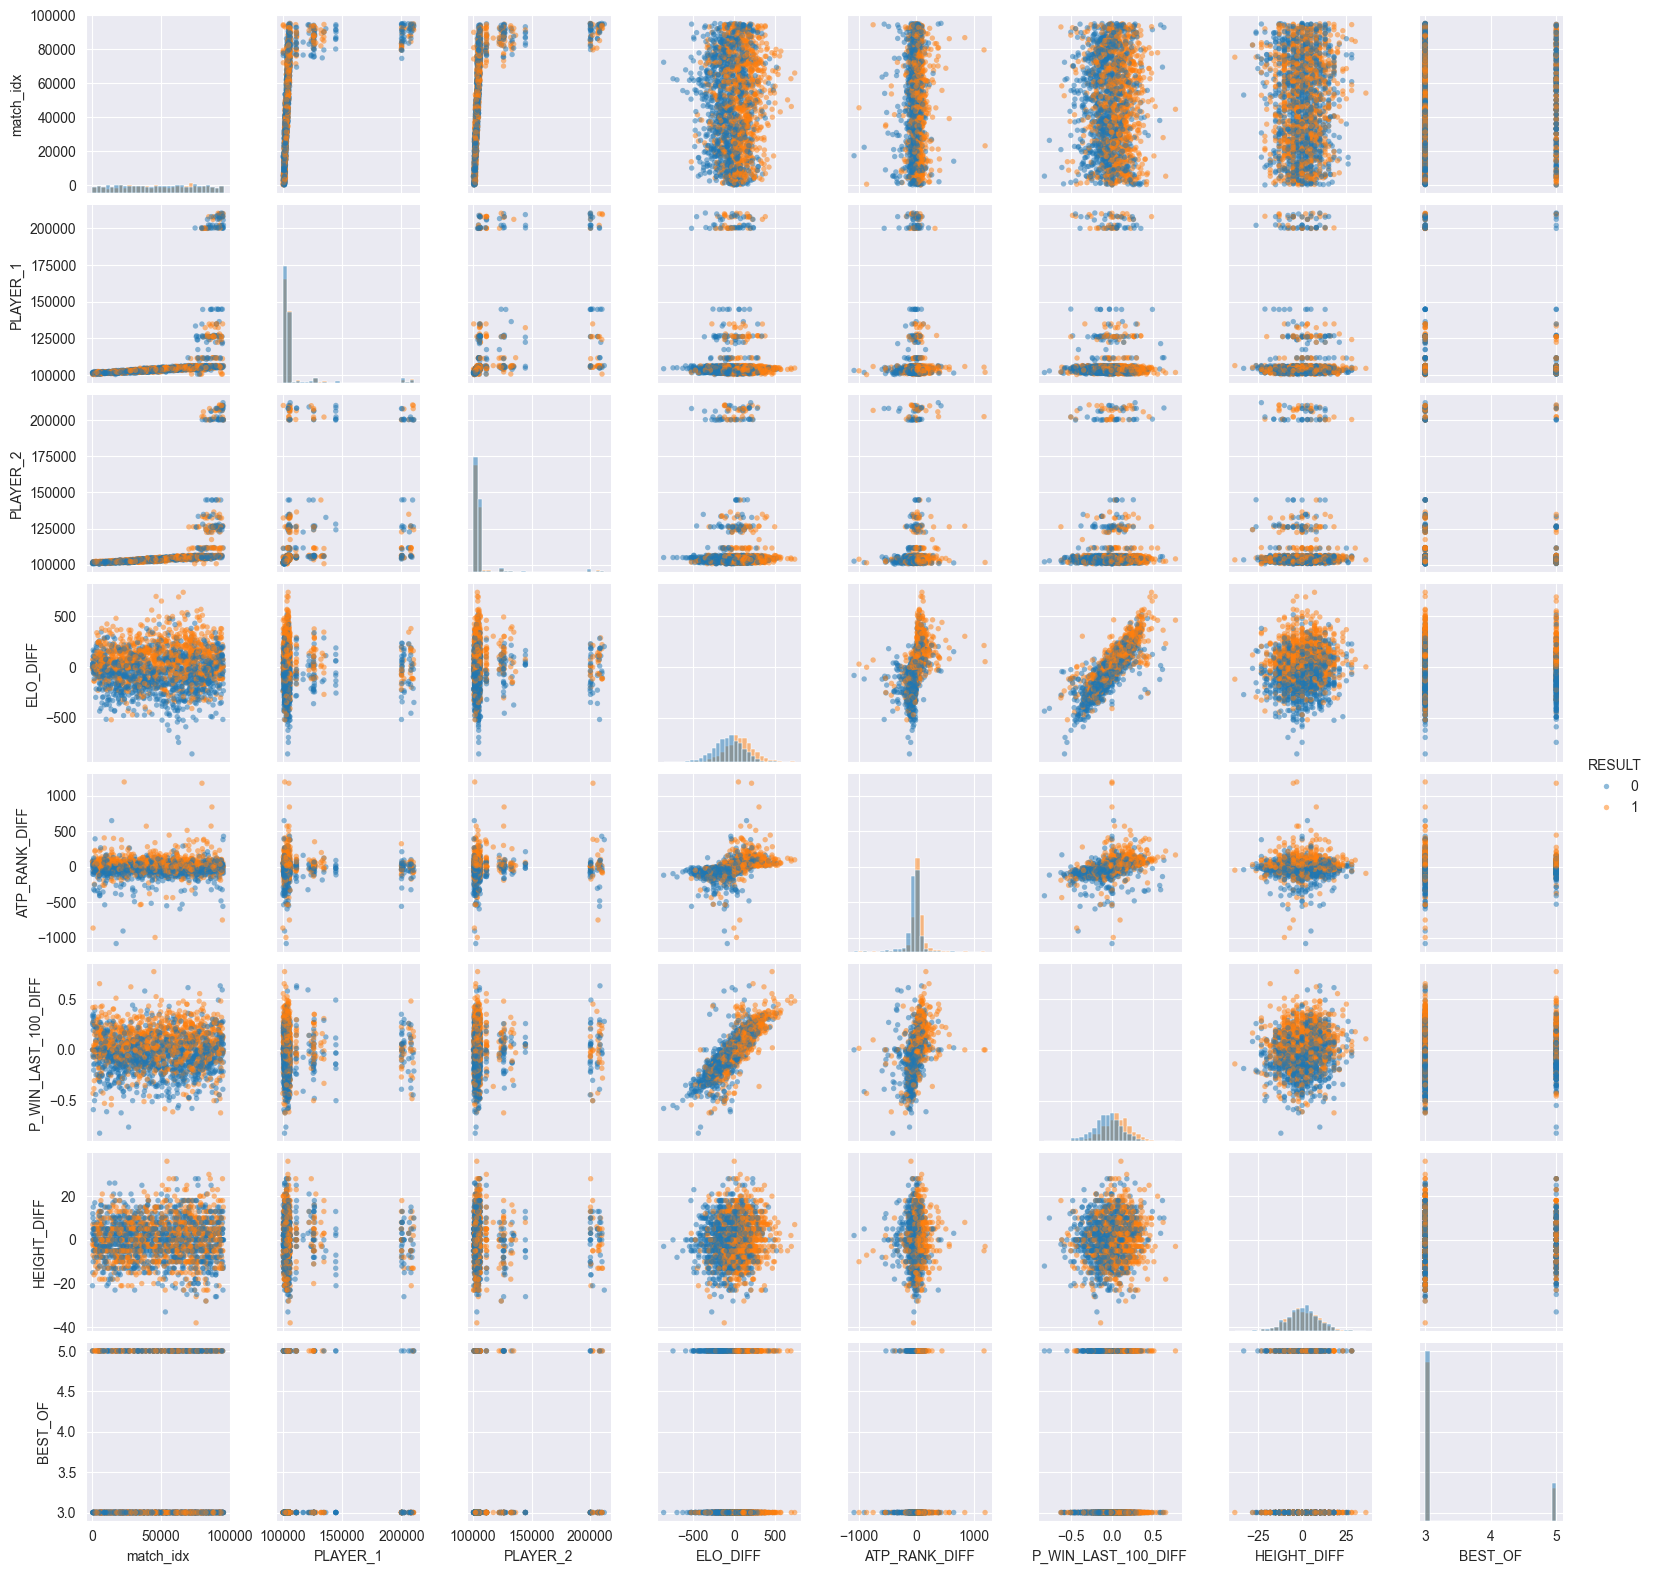

In [41]:
visualize_dataset(normalized_dataset)

На визуализации видно что некоторые фитчи как match_idx и id игроков бесполезны,
а разница в рейтинге наилучшим образом разделяет данные, для дерева решений эти поля станут основными